In [31]:
import pandas as pd
import numpy as np
from darts import TimeSeries

# Reading Dataframe

In [94]:
# Read a pandas DataFrame
df = pd.read_excel("/home/akash/Downloads/template_presage/test3.xlsx", usecols=['Date','power','variable2'])
# covariate1 = pd.read_excel("/home/akash/Downloads/template_presage/test3.xlsx", usecols=['Date','variable2'])
covariate2 = pd.read_excel("/home/akash/Downloads/template_presage/test3.xlsx", usecols=['Date','temperature'])
df

,Date,power,variable2
0,2017-02-01,44949.0,65589
1,2017-02-01,44216.0,61265
2,2017-02-01,43515.0,60065
3,2017-02-01,43619.0,57757
4,2017-02-01,44944.0,55883
...,...,...,...
1003,2017-03-14,NaN,62428
1004,2017-03-14,NaN,64218
1005,2017-03-14,NaN,59413
1006,2017-03-14,NaN,56391


# Timeseries - formation in darts format

In [95]:
# creating time series object for target variable
ts_P = TimeSeries.from_series(df[['power','variable2']])
# ts_future = TimeSeries.from_series(covariate1[['variable2']])
# ts_past = TimeSeries.from_series(covariate2[['temperature']])

In [96]:
ts_P

<TimeSeries (DataArray) (time: 1008, component: 2, sample: 1)>
array([[[44949.],
        [65589.]],

       [[44216.],
        [61265.]],

       [[43515.],
        [60065.]],

       ...,

       [[   nan],
        [59413.]],

       [[   nan],
        [56391.]],

       [[   nan],
        [59015.]]])
Coordinates:
  * time       (time) int64 0 1 2 3 4 5 6 ... 1001 1002 1003 1004 1005 1006 1007
  * component  (component) object 'power' 'variable2'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

# covaiate 

In [98]:
df['power']=df['power'].replace(np.nan,df['power'].mean())

In [100]:
# series.set_index(df['Date'])
ts_P

<TimeSeries (DataArray) (time: 1008, component: 2, sample: 1)>
array([[[44949.],
        [65589.]],

       [[44216.],
        [61265.]],

       [[43515.],
        [60065.]],

       ...,

       [[   nan],
        [59413.]],

       [[   nan],
        [56391.]],

       [[   nan],
        [59015.]]])
Coordinates:
  * time       (time) int64 0 1 2 3 4 5 6 ... 1001 1002 1003 1004 1005 1006 1007
  * component  (component) object 'power' 'variable2'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

# Visualization


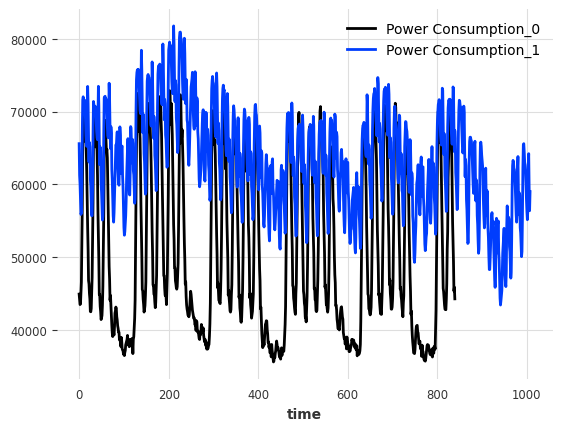

In [101]:
# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
series_power = ts_P
series_power.plot(label = "Power Consumption")
plt.legend()

# Feature scaling

In [103]:
df['power']

time
0       44949.000000
1       44216.000000
2       43515.000000
3       43619.000000
4       44944.000000
            ...     
1003    50219.902381
1004    50219.902381
1005    50219.902381
1006    50219.902381
1007    50219.902381
Name: power, Length: 1008, dtype: float64

In [104]:
maxP= df['power'].max()
minP=df['power'].min()

In [105]:
maxP,minP

(72872.0, 35645.0)

In [117]:
df['power'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1008 entries, 0 to 1007
Series name: power
Non-Null Count  Dtype  
--------------  -----  
1008 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


In [122]:
divide= maxP-minP
divide

37227.0

In [127]:
series_power_Scaled=(df['power']-minP)/divide

In [128]:
series_power_Scaled

time
0       0.249926
1       0.230236
2       0.211406
3       0.214199
4       0.249792
          ...   
1003    0.391514
1004    0.391514
1005    0.391514
1006    0.391514
1007    0.391514
Name: power, Length: 1008, dtype: float64

In [129]:
ts_P1=TimeSeries.from_series(series_power_Scaled)

In [130]:
ts_P1

<TimeSeries (DataArray) (time: 1008, component: 1, sample: 1)>
array([[[0.24992613]],

       [[0.23023612]],

       [[0.2114057 ]],

       ...,

       [[0.39151429]],

       [[0.39151429]],

       [[0.39151429]]])
Coordinates:
  * time       (time) int64 0 1 2 3 4 5 6 ... 1001 1002 1003 1004 1005 1006 1007
  * component  (component) object 'power'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [126]:
df['power']

time
0       44949.000000
1       44216.000000
2       43515.000000
3       43619.000000
4       44944.000000
            ...     
1003    50219.902381
1004    50219.902381
1005    50219.902381
1006    50219.902381
1007    50219.902381
Name: power, Length: 1008, dtype: float64

In [41]:

from darts.dataprocessing.transformers import Scaler
scaler_variable2= Scaler()

series_power_scaled = scaler_variable2.fit_transform(series_power)


In [42]:
# series_variable2_scaled
series_power_scaled

<TimeSeries (DataArray) (time: 1008, component: 2, sample: 1)>
array([[[0.24992613],
        [0.5780691 ]],

       [[0.23023612],
        [0.46515029]],

       [[0.2114057 ],
        [0.43381297]],

       ...,

       [[       nan],
        [0.41678636]],

       [[       nan],
        [0.33786854]],

       [[       nan],
        [0.40639281]]])
Coordinates:
  * time       (time) int64 0 1 2 3 4 5 6 ... 1001 1002 1003 1004 1005 1006 1007
  * component  (component) object 'power' 'variable2'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

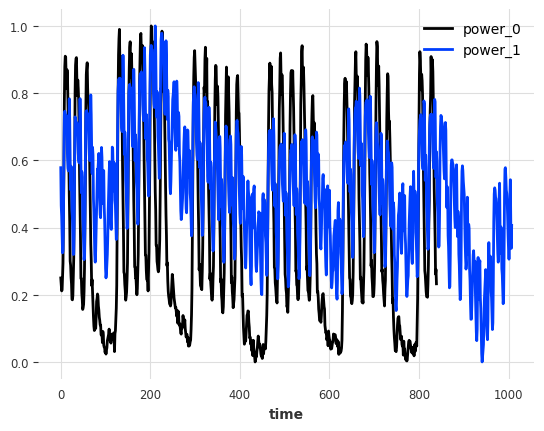

In [43]:
# Visualization
series_power_scaled.plot(label = "power")
plt.legend();

# Train test split

In [44]:
# train_power, test_power = series_variable2_scaled[:840], series_variable2_scaled[840:]
train_power, test_power = series_power_scaled['power'][:840], series_power_scaled['power'][840:]
variable=series_power_scaled['variable2'][:840]
# past_cov1, past_cov2 = covariate1[:840], covariate2[:840]
# future_cov1, future_cov2 = covariate1[840:], covariate2[840:]

In [45]:
# Importing the dependencies

from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel
from darts.metrics import mape, smape
     


In [46]:
# Model Building
model_power = NBEATSModel(
    generic_architecture=True,
#     num_stacks=3,
#     num_blocks=2,
#     num_layers=3,
#     layer_widths=1,
    
    input_chunk_length = 336,
    output_chunk_length = 168,
    n_epochs = 100,
    random_state = 0)

# Model Training

In [47]:
train_power

<TimeSeries (DataArray) (time: 840, component: 1, sample: 1)>
array([[[0.24992613]],

       [[0.23023612]],

       [[0.2114057 ]],

       [[0.21419937]],

       [[0.24979182]],

       [[0.29411449]],

       [[0.4334757 ]],

       [[0.56856583]],

       [[0.77352459]],

       [[0.87877078]],

...

       [[0.89958901]],

       [[0.86399656]],

       [[0.77782255]],

       [[0.64528434]],

       [[0.51540549]],

       [[0.44927069]],

       [[0.37010772]],

       [[0.2611814 ]],

       [[0.27525721]],

       [[0.23251941]]])
Coordinates:
  * time       (time) int64 0 1 2 3 4 5 6 7 ... 832 833 834 835 836 837 838 839
  * component  (component) object 'power'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [48]:
model_power.fit(series=train_power,
          past_covariates=variable,
          future_covariates=None, #train_power['variable2'],
          verbose = True)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 11.3 M
---------------------------------------------------
11.3 M    Trainable params
5.3 K     Non-trainable params
11.3 M    Total params
90.788    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


In [49]:
# Prediction for power
pred = model_power.predict(n = 168, series = train_power['power'])

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

In [135]:
pred=(pred*divide)+minP

In [136]:
pred

<TimeSeries (DataArray) (time: 168, component: 1, sample: 1)>
array([[[41594.30565785]],

       [[42979.30260098]],

       [[41015.33073067]],

       [[40836.14830043]],

       [[43667.95988144]],

       [[46090.27967782]],

       [[51410.49614486]],

       [[54650.74398282]],

       [[59249.62132523]],

       [[63978.09924357]],

...

       [[69503.15948217]],

       [[68976.56542879]],

       [[65149.87601209]],

       [[59362.76315218]],

       [[56371.02656199]],

       [[53087.83244741]],

       [[49269.47726947]],

       [[48549.33162519]],

       [[45624.97710791]],

       [[46019.70216665]]])
Coordinates:
  * time       (time) int64 840 841 842 843 844 845 ... 1003 1004 1005 1006 1007
  * component  (component) object 'power'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

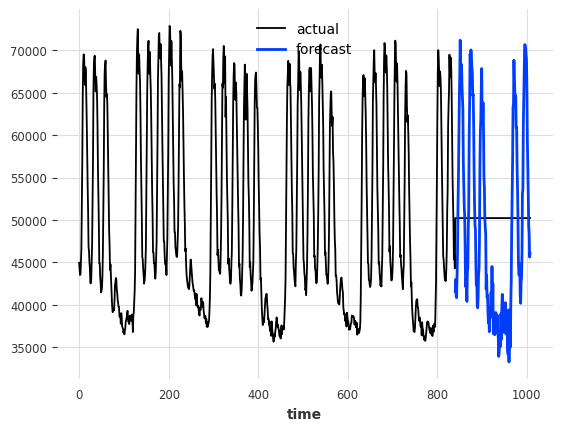

In [138]:
# Visualization for air predicted vs actual
# series_variable2_scaled.plot(label = "actual")
df['power'].plot(label = "actual")

pred.plot(label = "forecast" )
plt.legend();
# print("MAPE = {}".format(mape(df['power'], pred)))

In [139]:
Output=pred.pd_dataframe()

In [140]:
# y_prediction_future= scaler_variable2.inverse_transform(pred.pd_dataframe())

In [141]:
Output.to_excel("N_Beats_Output_5.xlsx", sheet_name="sheet 1")